# The Laplace Transform

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Theorems

The theorems of the Laplace transformation relate basic time-domain operations to their equivalents in the Laplace domain. They are of use for the computation of Laplace transforms of signals composed from modified [standard signals](../continuous_signals/standard_signals.ipynb) and for the computation of the response of systems to an input signal. The theorems allow further to predict the consequences of modifying a signal or system by certain operations.

### Temporal Scaling Theorem

A signal $x(t)$ is given for which the Laplace transform $X(s) = \mathcal{L} \{ x(t) \}$ exists. The Laplace transform of the [temporally scaled signal](../continuous_signals/operations.ipynb#Temporal-Scaling) $x(a t)$ with $a \in \mathbb{R} \setminus \{0\}$ reads

\begin{equation}
\mathcal{L} \{ x(a t) \} = \frac{1}{|a|} \cdot X \left( \frac{s}{a} \right)
\end{equation}

The Laplace transformation of a temporally scaled signal is given by weighting the inversely scaled Laplace transform of the unscaled signal with $\frac{1}{|a|}$. The scaling of the Laplace transform can be interpreted as a scaling of the complex $s$-plane. The region of convergence (ROC) of the temporally scaled signal $x(a t)$ is consequently the inversely scaled ROC of the unscaled signal $x(t)$

\begin{equation}
\text{ROC} \{ x(a t) \} = \left\{ s: \frac{s}{a} \in \text{ROC} \{ x(t) \} \right\}
\end{equation}

Above relation is known as scaling theorem of the Laplace transform. The scaling theorem can be proven by introducing the scaled signal $x(a t)$ into the definition of the Laplace transformation

\begin{equation}
\mathcal{L} \{ x(a t) \} = \int_{-\infty}^{\infty} x(a t) \, e^{- s t} \; dt = \frac{1}{|a|} \int_{-\infty}^{\infty} x(t') \, e^{-\frac{s}{a} t'} \; dt' = \frac{1}{|a|} \cdot X \left( \frac{s}{a} \right)
\end{equation}

where the substitution $t' = a t$ was used. Note that a negative value of $a$ would result in a reversal of the integration limits. In this case a second reversal of the integration limits together with the sign of the integration element $d t'= a \, dt$ was consolidated into the absolute value of $a$.

### Convolution Theorem

The convolution theorem states that the Laplace transform of the convolution of two signals $x(t)$ and $y(t)$ is equal to the scalar multiplication of their Laplace transforms $X(s)$ and $Y(s)$

\begin{equation}
\mathcal{L} \{ x(t) * y(t) \} = X(s) \cdot Y(s)
\end{equation}

under the assumption that both Laplace transforms $X(s) = \mathcal{L} \{ x(t) \}$ and $Y(s) = \mathcal{L} \{ y(t) \}$ exist, respectively. The ROC of the convolution $x(t) * y(t)$ includes at least the intersection of the ROCs of $x(t)$ and $y(t)$

\begin{equation}
\text{ROC} \{ x(t) * y(t) \} \supseteq \text{ROC} \{ x(t) \} \cap \text{ROC} \{ y(t) \}
\end{equation}


The theorem can be proven by introducing the [definition of the convolution](../systems_time_domain/convolution.ipynb) into the [definition of the Laplace transform](definition.ipynb) and changing the order of integration

\begin{align}
\mathcal{L} \{ x(t) * y(t) \} &= \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} x(\tau) \cdot y(t-\tau) \; d \tau \right) e^{-s t} \; dt \\
&= \int_{-\infty}^{\infty} \left( \int_{-\infty}^{\infty} y(t-\tau) \, e^{-s t} \; dt \right) x(\tau) \; d\tau \\
&= Y(s) \cdot \int_{-\infty}^{\infty} x(\tau) \, e^{-s \tau} \; d \tau \\
&= Y(s) \cdot X(s)
\end{align}



The convolution theorem is very useful in the context of linear time-invariant (LTI) systems. The output signal $y(t)$ of an LTI system is given as the convolution of the input signal $x(t)$ with the impulse response $h(t)$. The signals can be represented either in the time or Laplace domain. This leads to the following equivalent representations of an LTI system in the time and Laplace domain, respectively

![Representation of an LTI system in the time- and Laplace-domain](LTI_system_Laplace_domain.png)

Calculation of the system response by transforming the problem into the Laplace domain can be beneficial since this replaces the evaluation of the convolution integral by a scalar multiplication. In many cases this procedure simplifies the calculation of the system response significantly. A prominent example is the [analysis of a passive electrical network](network_analysis.ipynb). The convolution theorem can also be useful to derive an unknown Laplace transform. The key is here to express the signal as convolution of two other signals for which the Laplace transforms are known. This is illustrated by the following example.

**Example - Transformation of two convolved signals**

The Laplace transform of the convolution of a causal cosine signal $\epsilon(t) \cdot \cos(\omega_0 t)$ with a causal sine signal $\epsilon(t) \cdot \sin(\omega_0 t)$ is derived by the convolution theorem

\begin{equation}
\mathcal{L} \{ \epsilon(t) \cdot ( \cos(\omega_0 t) * \sin(\omega_0 t) \} 
= \frac{s}{s^2 + \omega_0^2} \cdot \frac{\omega_0}{s^2 + \omega_0^2}
= \frac{\omega_0 s}{(s^2 + \omega_0^2)^2}
\end{equation}

where the [Laplace transforms of the causal cosine and sine signals](properties.ipynb#Transformation-of-the-cosine-and-sine-signal) were used. The ROC of the causal cosine and sine signal is $\Re \{ s \} > 0$. The ROC for their convolution is also $\Re \{ s \} > 0$, since no poles and zeros cancel out. Above Laplace transform has one zero $s_{00} = 0$, and two poles of second degree $s_{\infty 0} = s_{\infty 1} = j \omega_0$ and $s_{\infty 2} = s_{\infty 3} = - j \omega_0$.

This example is evaluated numerically in the following. First the convolution of the causal cosine and sine signal is computed

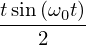

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)
s = sym.symbols('s', complex=True)
w0 = sym.symbols('omega0', positive=True)

x = sym.integrate(sym.cos(w0*tau) * sym.sin(w0*(t-tau)), (tau, 0, t))
x = sym.simplify(x)
x

For the sake of illustration let's plot the signal for $\omega_0 = 1$

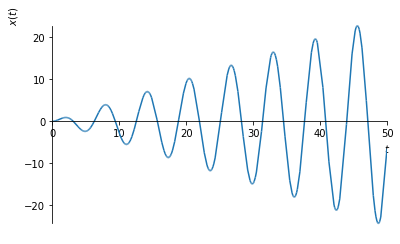

In [2]:
sym.plot(x.subs(w0, 1), (t, 0, 50), xlabel=r'$t$', ylabel=r'$x(t)$');

The Laplace transform is computed

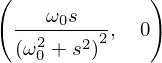

In [3]:
X, a, cond = sym.laplace_transform(x, t, s)
X, a

which exists for $\Re \{ s \} > 0$. Its zeros are given as

In [4]:
sym.roots(sym.numer(X), s)

and its poles as

In [5]:
sym.roots(sym.denom(X), s)

### Temporal Shift Theorem

The [temporal shift of a signal](../continuous_signals/operations.ipynb#Temporal-Shift) $x(t - \tau)$ for $\tau \in \mathbb{R}$ can be expressed by the convolution of the signal $x(t)$ with a shifted Dirac impulse

\begin{equation}
x(t - \tau) = x(t) * \delta(t - \tau)
\end{equation}

This follows from the sifting property of the Dirac impulse. Applying a two-sided Laplace transform to the left- and right-hand side and exploiting the convolution theorem yields

\begin{equation}
\mathcal{L} \{ x(t - \tau) \} = X(s) \cdot e^{- s \tau}
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$ is assumed to exist. Note that $\mathcal{L} \{ \delta(t - \tau) \} = e^{- s \tau}$ can be derived from the definition of the two-sided Laplace transform together with the sifting property of the Dirac impulse. The Laplace transform of a shifted signal is given by multiplying the Laplace transform of the original signal with $e^{- s \tau}$. The ROC does not change

\begin{equation}
\text{ROC} \{ x(t-\tau) \} = \text{ROC} \{ x(t) \}
\end{equation}

This result is known as shift theorem of the Laplace transform. For a causal signal $x(t)$ and $\tau > 0$ the shift theorem of the one-sided Laplace transform is equal to the shift theorem of the two-sided transform.

#### Transformation of the rectangular signal

The Laplace transform of the [rectangular signal](../continuous_signals/standard_signals.ipynb#Rectangular-Signal) $x(t) = \text{rect}(t)$ is derived by expressing it by the Heaviside signal

\begin{equation}
\text{rect}(t) = \epsilon \left(t + \frac{1}{2} \right) - \epsilon \left(t - \frac{1}{2} \right)
\end{equation}

Applying the shift theorem to the [transform of the Heaviside signal](definition.ipynb#Transformation-of-the-Heaviside-Signal) and exploiting the linearity of the Laplace transform yields

\begin{equation}
\mathcal{L} \{ \text{rect}(t) \} = \frac{1}{s} e^{s \frac{1}{2}} - \frac{1}{s} e^{- s \frac{1}{2}} = \frac{\sinh \left( \frac{s}{2} \right) }{\frac{s}{2}}
\end{equation}

where $\sinh(\cdot)$ denotes the [hyperbolic sine function](https://en.wikipedia.org/wiki/Hyperbolic_function#Sinh). The ROC of the Heaviside signal is given as $\Re \{ s \} > 0$. Applying [l'Hopitals rule](https://en.wikipedia.org/wiki/L'H%C3%B4pital's_rule), the pole at $s=0$ can be disregarded leading to

\begin{equation}
\text{ROC} \{ \text{rect}(t) \} = \mathbb{C}
\end{equation}

For illustration, the magnitude of the Laplace transform $|X(s)|$ is plotted in the $s$-plane, as well as $X(\sigma)$ and $X(j \omega)$ for the real and imaginary part of the complex frequency $s = \sigma + j \omega$.

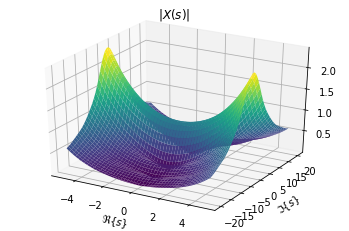

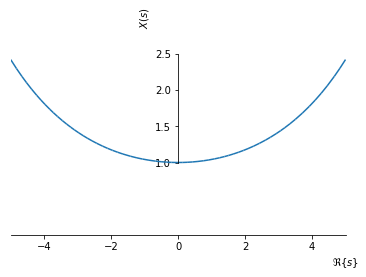

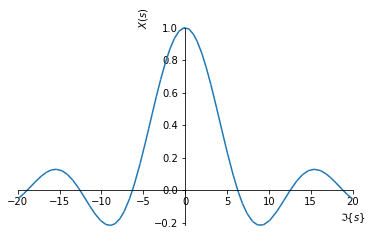

In [6]:
sigma, omega = sym.symbols('sigma omega')
X = sym.sinh(s/2)*2/s

sym.plotting.plot3d(abs(X.subs(s, sigma+sym.I*omega)), (sigma, -5, 5), (omega, -20, 20),
                    xlabel=r'$\Re\{s\}$', ylabel=r'$\Im\{s\}$', title=r'$|X(s)|$')

sym.plot(X.subs(s, sigma) , (sigma, -5, 5), xlabel=r'$\Re\{s\}$', ylabel=r'$X(s)$', ylim=(0, 3))

sym.plot(X.subs(s, sym.I*omega) , (omega, -20, 20), xlabel=r'$\Im\{s\}$', ylabel=r'$X(s)$');

**Exercise**

* Derive the Laplace transform $X(s) = \mathcal{L} \{ x(t) \}$ of the causal rectangular signal $x(t) = \text{rect} (a t - \frac{1}{2 a})$
* Derive the Laplace transform of the [triangular signal](../fourier_transform/theorems.ipynb#Transformation-of-the-triangular-signal) $x(t) = \Lambda(a t)$ with $a \in \mathbb{R} \setminus \{0\}$

### Differentiation Theorem

Derivatives of signals are the fundamental operations of differential equations. Ordinary differential equations (ODEs) with constant coefficients play an important role in the theory of linear time-invariant (LTI) systems. Consequently, the representation of the derivative of a signal in the Laplace domain is of special interest.

#### Two-sided transform

A differentiable signal $x(t)$ whose temporal derivative $\frac{d x(t)}{dt}$ exists is given. Using the [derivation property of the Dirac impulse](../continuous_signals/standard_signals.ipynb#Dirac-Impulse), the derivative of the signal can be expressed by the convolution

\begin{equation}
\frac{d x(t)}{dt} = \frac{d \delta(t)}{dt} * x(t)
\end{equation}

Applying a two-sided Laplace transformation to the left- and right-hand side together with the [convolution theorem](#Convolution-Theorem) yields the Laplace transform of the derivative of $x(t)$

\begin{equation}
\mathcal{L} \left\{ \frac{d x(t)}{dt} \right\} = s \cdot X(s)
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$. The two-sided Laplace transform $\mathcal{L} \{ \frac{d \delta(t)}{dt} \} = s$ can be derived by applying the definition of the Laplace transform together with the derivation property of the Dirac impulse. The ROC is given as a superset of the ROC for $x(t)$

\begin{equation}
\text{ROC} \left\{ \frac{d x(t)}{dt} \right\} \supseteq \text{ROC} \{ x(t) \}
\end{equation}

due to the zero at $s=0$ which may cancel out a pole.

Above result is known as differentiation theorem of the two-sided Laplace transform. It states that the differentiation of a signal in the time domain is equivalent to a multiplication of its spectrum by $s$.

#### One-sided transform

Many practical signals and systems are causal, hence $x(t) = 0$ for $t < 0$. A causal signal is potentially discontinuous for $t=0$. The direct application of above result for the two-sided Laplace transform is not possible since it assumes that the signal is differentiable for every time instant $t$. The potential discontinuity at $t=0$ has to be considered explicitly for the derivation of the differentiation theorem for the one-sided Laplace transform [[Girod et al.](index.ipynb#Literature)]

\begin{equation}
\mathcal{L} \left\{ \frac{d x(t)}{dt} \right\} = s \cdot X(s) - x(0+)
\end{equation}

where $x(0+) := \lim_{\epsilon \to 0} x(0+\epsilon)$ denotes the right sided limit value of $x(t)$ for $t=0$. The ROC is given as a superset of the ROC of $x(t)$

\begin{equation}
\text{ROC} \left\{ \frac{d x(t)}{dt} \right\} \supseteq \text{ROC} \{ x(t) \}
\end{equation}

due to the zero at $s=0$ which may cancel out a pole. The one-sided Laplace transform of a causal signal is equal to its two-sided transform. Above result holds therefore also for the two-sided transform of a causal signal.

The main application of the differentiation theorem is the transformation and solution of differential equations under consideration of initial values. Another application area is the derivation of transforms of signals which can be expressed as derivatives of other signals.

### Integration Theorem

An integrable signal $x(t)$ for which the integral $\int_{-\infty}^{t} x(\tau) \; d\tau$ exists is given. The integration can be represented as convolution with the rectangular signal $\epsilon(t)$

\begin{equation}
\int_{-\infty}^{t} x(\tau) \; d\tau = \int_{-\infty}^{\infty} x(\tau) \cdot \epsilon(t - \tau) \; d\tau = \epsilon(t) * x(t)
\end{equation}

as illustrated below

![Representation of an integration as convolution](integration_as_convolution.png)

Two-sided Laplace transformation of the left- and right-hand side of above equation, application of the convolution theorem and using the Laplace transform of the Heaviside signal $\epsilon(t)$ yields

\begin{equation}
\mathcal{L} \left\{ \int_{-\infty}^{t} x(\tau) \; d\tau \right\} 
= \frac{1}{s} \cdot X(s)
\end{equation}

The ROC is given as a superset of the intersection of the ROC of $x(t)$ and the right $s$-half-plane

\begin{equation}
\text{ROC} \left\{ \int_{-\infty}^{t} x(\tau) \; d\tau \right\} \supseteq \text{ROC} \{ x(t) \} \cap \{s : \Re \{ s \} > 0\}
\end{equation}

due to the pole at $s=0$. This integration theorem holds also for the one-sided Laplace transform.

#### Transformation of the ramp signal

The Laplace transform of the causal [ramp signal](https://en.wikipedia.org/wiki/Ramp_function) $t \cdot \epsilon(t)$ is derived by applying the integration theorem. The ramp signal can be expressed as integration over the Heaviside signal

\begin{equation}
t \cdot \epsilon(t) = \int_{-\infty}^{t} \tau \cdot \epsilon(\tau) \; d \tau
\end{equation}

Laplace transformation of the left- and right-hand side and application of the integration theorem together with the Laplace transform of the Heaviside signal yields

\begin{equation}
\mathcal{L} \{ t \cdot \epsilon(t) \} = \frac{1}{s^2}
\end{equation}

with

\begin{equation}
\text{ROC} \{ t \cdot \epsilon(t) \} = \{s : \Re \{ s \} > 0\}
\end{equation}

**Exercise**

* Derive the Laplace transform $X(s) = \mathcal{L} \{ x(t) \}$ of the signal $x(t) = t^n \cdot \epsilon(t)$ with $n \geq 0$ by repeated application of the integration theorem.
* Compare your result to the numerical result below. Note that $\Gamma(n+1) = n!$ for $n \in \mathbb{N}$.

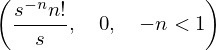

In [7]:
n = sym.symbols('n', integer=True)

X, a, cond = sym.laplace_transform(t**n, t, s)
X, a, cond

### Modulation Theorem

The complex modulation of a signal $x(t)$ is defined as $e^{s_0 t} \cdot x(t)$ with $s_0 \in \mathbb{C}$. The Laplace transform of a modulated signal is derived by introducing it into the definition of the two-sided Laplace transform

\begin{align}
\mathcal{L} \left\{ e^{s_0 t} \cdot x(t) \right\} &=
\int_{-\infty}^{\infty} e^{s_0 t} x(t) \, e^{-s t} \; dt =
\int_{-\infty}^{\infty} x(t) \, e^{- (s - s_0) t} \; dt \\
&= X(s-s_0)
\end{align}

where $X(s) = \mathcal{L} \{ x(t) \}$. Modulation of the signal $x(t)$ leads to a translation of the $s$-plane into the direction given by the complex value $s_0$. Consequently, the ROC is also shifted 

\begin{equation}
\text{ROC} \{ e^{s_0 t} \cdot x(t) \} = \{s: s - \Re \{ s_0 \} \in \text{ROC} \{ x(t) \} \}
\end{equation}

This relation is known as modulation theorem.

**Example - Transformation of $t^n e^{-s_0 t} \epsilon(t)$**

The Laplace transform of the signal $t^n \cdot \epsilon(t)$ 

\begin{equation}
\mathcal{L} \{ t^n \cdot \epsilon(t) \} = \frac{n!}{s^{n+1}}
\end{equation}

for $\Re \{ s \} > 0$ was derived in the previous example. This result can be extended to the class of signals $t^n e^{-s_0 t} \epsilon(t)$ with $s_0 \in \mathbb{C}$ using the modulation theorem

\begin{equation}
\mathcal{L} \{ t^n e^{-s_0 t} \epsilon(t) \} = \frac{n!}{(s + s_0)^{n+1}} \qquad \text{for } \Re \{ s \} > \Re \{ - s_0 \}.
\end{equation}

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.